<a href="https://colab.research.google.com/github/ashleychoi121/Machine-Learning-Bankruptcy-Predictor/blob/main/Capstone_II_Loan_Dataset_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
loan_train = pd.read_csv(r'C:\Users\cya15\OneDrive\Documents\Thinkful_Data Science Bootcamp\credit_train.csv')
#loan_train = pd.read_csv('credit_train.csv')
# data from Kaggle: https://www.kaggle.com/datasets/zaurbegiev/my-dataset
loan_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
#Making copy of the original dataset.
df_train = loan_train.copy()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
df_train.drop(['Loan ID', 'Customer ID'], axis = 1, inplace = True)

In [ ]:
#No delinquent data is NaN. Thus, changing them to 0.0 months.
df_train['Months since last delinquent'] = df_train['Months since last delinquent'].apply(lambda x: 0.0 if x ==np.NaN else x)

In [ ]:
df_train.drop_duplicates(inplace = True)
df_train.dropna(inplace=True)

In [ ]:
#Maximum possible credit score is 900. So anything above it going to be NA and replaced with mean Credit Score.
df_train['Credit Score'] = df_train['Credit Score'].apply(lambda x: np.NaN if x >= 900 else x)

In [ ]:
df_train['Credit Score'] = df_train['Credit Score'].fillna(df_train['Credit Score'].mean())

In [ ]:
df_train.shape

(31254, 17)

In [ ]:
df_train.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,0.106522,0.017543,-0.002620,0.016059,0.012404,0.003097,-0.000363,0.008814,-0.001628,-0.000469,-0.003754
Credit Score,0.106522,1.000000,-0.004512,-0.082201,0.068355,0.044032,-0.007643,-0.040231,-0.014659,0.019183,-0.028300,-0.015051
Annual Income,0.017543,-0.004512,1.000000,0.549013,0.172627,-0.074343,0.136646,-0.016934,0.347657,0.045589,-0.062266,0.058991
Monthly Debt,-0.002620,-0.082201,0.549013,1.000000,0.175281,-0.058461,0.376494,-0.046203,0.440966,0.038538,-0.074317,0.030203
Years of Credit History,0.016059,0.068355,0.172627,0.175281,1.000000,-0.043186,0.100001,0.022365,0.204042,0.029919,0.021439,0.010929
Months since last delinquent,0.012404,0.044032,-0.074343,-0.058461,-0.043186,1.000000,-0.030883,0.099127,-0.026890,-0.006302,0.121035,0.010020
Number of Open Accounts,0.003097,-0.007643,0.136646,0.376494,0.100001,-0.030883,1.000000,-0.017430,0.224102,0.030206,-0.022869,0.000764
Number of Credit Problems,-0.000363,-0.040231,-0.016934,-0.046203,0.022365,0.099127,-0.017430,1.000000,-0.108240,-0.011378,0.699446,0.608190
Current Credit Balance,0.008814,-0.014659,0.347657,0.440966,0.204042,-0.026890,0.224102,-0.108240,1.000000,0.147560,-0.120592,-0.013870
Maximum Open Credit,-0.001628,0.019183,0.045589,0.038538,0.029919,-0.006302,0.030206,-0.011378,0.147560,1.000000,-0.016032,-0.003080


Text(0.5, 1.0, 'correlation matrix')

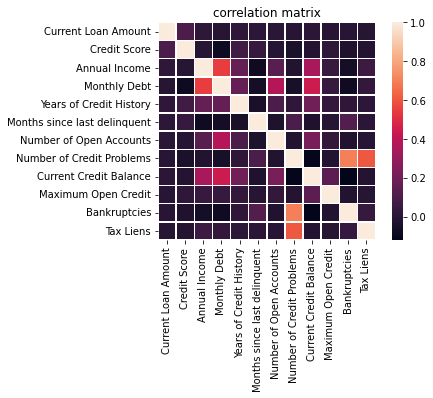

In [ ]:
#Heatmap to see the correlation table more visually
sns.heatmap(df_train.corr(), square=True, annot=False, linewidths=.5)
plt.title("correlation matrix")

Text(0.5, 1.0, 'Max Open Credit')

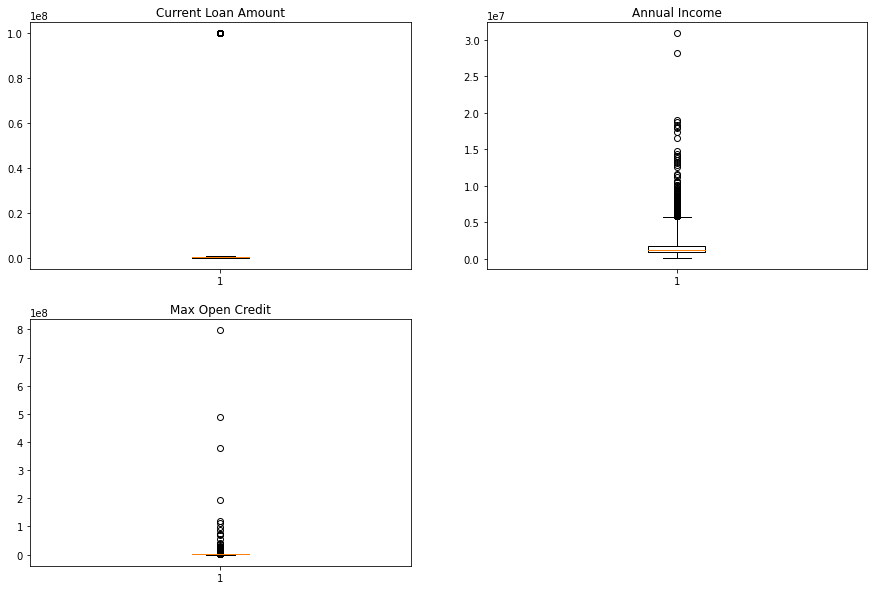

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.boxplot(df_train['Current Loan Amount'], whis = 5)
plt.title('Current Loan Amount')

plt.subplot(2,2,2)
plt.boxplot(df_train['Annual Income'], whis = 5)
plt.title('Annual Income')


plt.subplot(2,2,3)
plt.boxplot(df_train['Maximum Open Credit'], whis = 5)
plt.title('Max Open Credit')

In [ ]:
from scipy.stats.mstats import winsorize
df_train['Windsorzied Loan Amount'] = winsorize(df_train['Current Loan Amount'], (0, 0.05))
df_train['Windsorzied Annual Income'] = winsorize(df_train['Annual Income'], (0, 0.05))
df_train['Windsorzied Max Credit'] = winsorize(df_train['Maximum Open Credit'], (0, 0.05))

Text(0.5, 1.0, 'Windsorzied Max Credit')

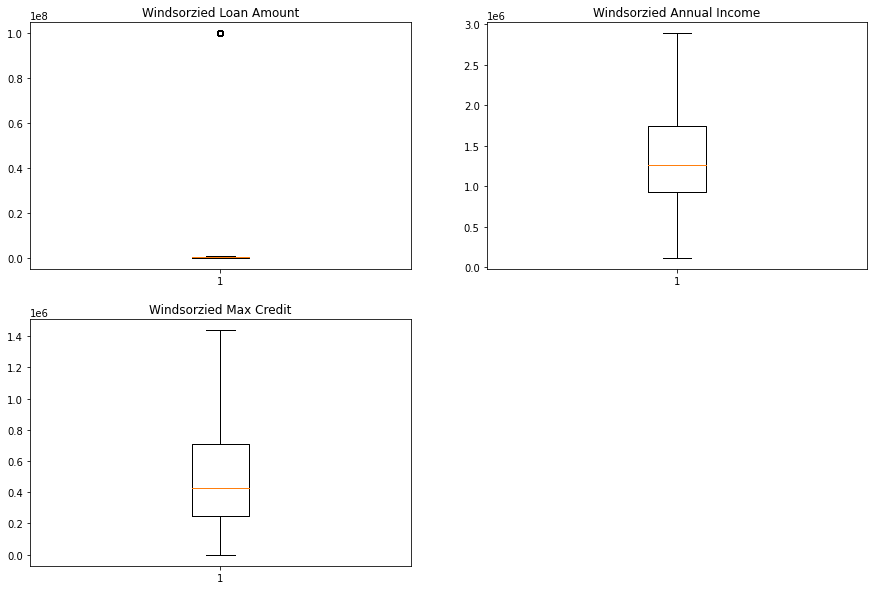

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.boxplot(df_train['Windsorzied Loan Amount'], whis = 5)
plt.title('Windsorzied Loan Amount')

plt.subplot(2,2,2)
plt.boxplot(df_train['Windsorzied Annual Income'], whis = 5)
plt.title('Windsorzied Annual Income')

plt.subplot(2,2,3)
plt.boxplot(df_train['Windsorzied Max Credit'], whis = 5)
plt.title('Windsorzied Max Credit')

In [ ]:
#After adding windsorized variables, dropping corresponding original variables.
df_train.drop(['Current Loan Amount', 'Annual Income', 'Maximum Open Credit'], axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


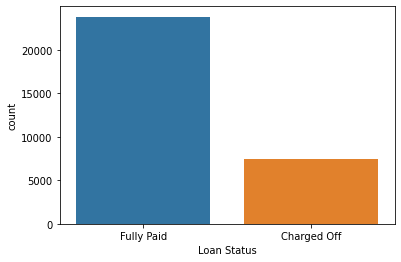

In [ ]:
#Visualization of categorical variables
sns.countplot(df_train["Loan Status"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


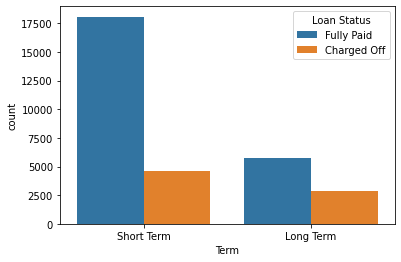

In [ ]:
#Counter plotting Loan Term grouped by Loan Status
sns.countplot(df_train["Term"],hue=df_train["Loan Status"])

Shor term loans are more paid off compared long term loans.

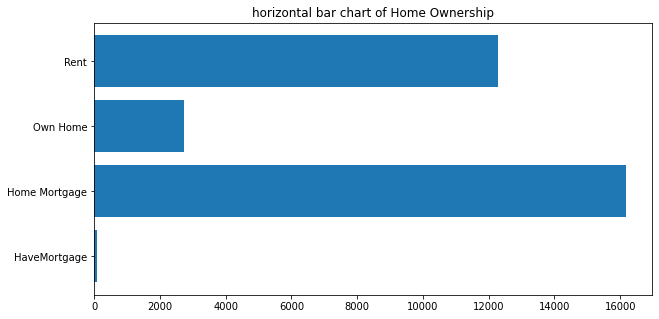

In [ ]:
#Bar chart of Home Onwership to see the percentage of home onwership
plt.figure(figsize=(10,5))
plt.barh(df_train.groupby("Home Ownership")["Home Ownership"].count().index, 
        df_train.groupby("Home Ownership")["Home Ownership"].count())
plt.title("horizontal bar chart of Home Ownership")

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


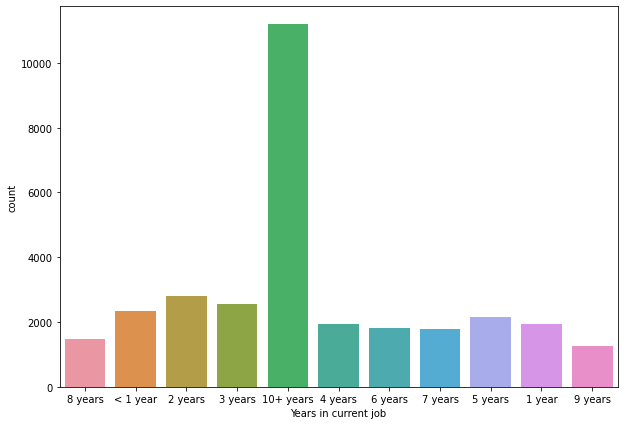

In [ ]:
#bar plot grouped by Years in Current job 
plt.figure(figsize = (10,7))
sns.countplot(df_train['Years in current job'])

Surprisingly, a large percentage of customer base has been working at their current job 10+ years. 

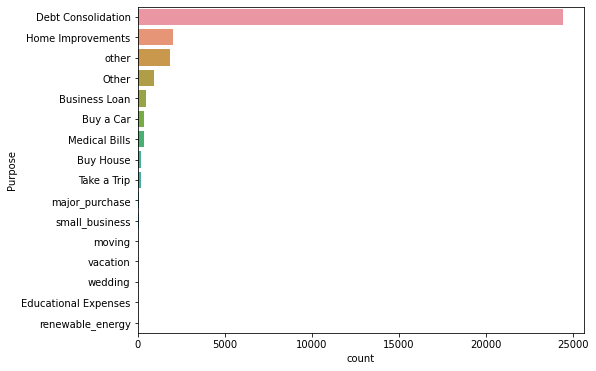

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y='Purpose' , data=df_train, order = df_train['Purpose'].value_counts().index)

Majority of loan customers are issuing new loans to consolidate existing loans. 

In [ ]:
#Trasforming categorical variables into numerical data by  using get_dummies function. 

dumm = pd.get_dummies(df_train['Purpose'], prefix="Purpose", drop_first=True)
df_train = pd.concat([df_train, dumm], axis=1)

dumm = pd.get_dummies(df_train['Home Ownership'], prefix="Ownership", drop_first=True)
df_train = pd.concat([df_train, dumm], axis=1)

dumm = pd.get_dummies(df_train['Loan Status'], prefix="Status", drop_first=True)
df_train = pd.concat([df_train, dumm], axis=1)

dumm = pd.get_dummies(df_train['Term'], prefix="Term", drop_first=True)
df_train = pd.concat([df_train, dumm], axis=1)

dumm = pd.get_dummies(df_train['Years in current job'], prefix="Years in current job", drop_first=True)
df_train = pd.concat([df_train, dumm], axis=1)

df_train.drop(['Purpose', 'Home Ownership', 'Loan Status', 'Term', 'Years in current job'], axis = 1, inplace = True)

In [ ]:
df_train.head()

,Credit Score,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Windsorzied Loan Amount,...,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
2,741.0,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0,99999999.0,...,0,0,0,0,0,0,0,1,0,0
6,730.0,10855.08,19.6,10.0,13.0,1.0,122170.0,1.0,0.0,217646.0,...,0,0,0,0,0,0,0,0,0,1
8,678.0,18660.28,22.6,33.0,4.0,0.0,437171.0,0.0,0.0,548746.0,...,0,1,0,0,0,0,0,0,0,0
10,728.0,11851.06,16.0,76.0,16.0,0.0,203965.0,0.0,0.0,99999999.0,...,0,0,1,0,0,0,0,0,0,0
12,740.0,11578.22,8.5,25.0,6.0,0.0,134083.0,0.0,0.0,99999999.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31254 entries, 2 to 99997
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Credit Score                    31254 non-null  float64
 1   Monthly Debt                    31254 non-null  float64
 2   Years of Credit History         31254 non-null  float64
 3   Months since last delinquent    31254 non-null  float64
 4   Number of Open Accounts         31254 non-null  float64
 5   Number of Credit Problems       31254 non-null  float64
 6   Current Credit Balance          31254 non-null  float64
 7   Bankruptcies                    31254 non-null  float64
 8   Tax Liens                       31254 non-null  float64
 9   Windsorzied Loan Amount         31254 non-null  float64
 10  Windsorzied Annual Income       31254 non-null  float64
 11  Windsorzied Max Credit          31254 non-null  float64
 12  Purpose_Buy House               

In [ ]:
from sklearn.model_selection import train_test_split

Y = df_train['Bankruptcies']
X = df_train.loc[:, ~df_train.columns.isin(['Bankruptcies'])]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

The target value is bankrupcies and variables are credit score, monthly debt, purpose, current credit balance, years in current job, etc. Using the variables, I would like to build a model to train and predict whether the customer would likely to file bankrupcy. 

In [ ]:
import statsmodels.api as sm
X_ols = sm.add_constant(X_train)

results = sm.OLS(y_train, X_ols).fit()

results.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Bankruptcies   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1315.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:56:42   Log-Likelihood:                 5203.2
No. Observations:               20940   AIC:                        -1.032e+04
Df Residuals:                   20898   BIC:                            -9989.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0869      0.056     -1.565      0.118      -0.196       0.022
Credit Score                    9.628e-05   5.78e-05      1.667      0.096    -1.7e-05       0.000
Monthly Debt                    1.593e-07   1.52e-07      1.051      0.293   -1.38e-07    4.56e-07
Years of Credit History            0.0006      0.000      2.823      0.005       0.000       0.001
Months since last delinquent       0.0003   6.07e-05      4.340      0.000       0.000       0.000
Number of Open Accounts            0.0001      0.000      0.339      0.735      -0.001       0.001
Number of Credit Problems          0.7160      0.003    224.809      0.000       0.710       0.722
Current Credit Balance         -1.091e-08   5.65e-09     -1.931      0.054    -2.2e-08    1.65e-10
Tax Liens                         -0.7203      0.005   -134.958      0.000      -0.731      -0.710
Windsorzied Loan Amount        -3.797e-11   3.72e-11     -1.021      0.307   -1.11e-10    3.49e-11
Windsorzied Annual Income      -5.413e-09   2.69e-09     -2.012      0.044   -1.07e-08   -1.39e-10
Windsorzied Max Credit         -7.968e-09   5.35e-09     -1.489      0.137   -1.85e-08    2.52e-09
Purpose_Buy House                  0.0164      0.019      0.872      0.383      -0.020       0.053
Purpose_Buy a Car                 -0.0077      0.016     -0.481      0.630      -0.039       0.024
Purpose_Debt Consolidation         0.0197      0.011      1.838      0.066      -0.001       0.041
Purpose_Educational Expenses      -0.0284      0.044     -0.652      0.514      -0.114       0.057
Purpose_Home Improvements          0.0219      0.012      1.854      0.064      -0.001       0.045
Purpose_Medical Bills              0.0134      0.016      0.815      0.415      -0.019       0.046
Purpose_Other                      0.0024      0.013      0.185      0.853      -0.023       0.028
Purpose_Take a Trip                0.0120      0.024      0.494      0.621      -0.036       0.060
Purpose_major_purchase             0.0287      0.025      1.164      0.245      -0.020       0.077
Purpose_moving                     0.0043      0.034      0.125      0.901      -0.063       0.071
Purpose_other                      0.0053      0.012      0.452      0.651      -0.018       0.028
Purpose_renewable_energy          -0.0120      0.189     -0.063      0.950      -0.383       0.359
Purpose_small_business             0.0297      0.026      1.164      0.244      -0.020       0.080
Purpose_vacation                  -0.1780      0.042     -4.270      0.000      -0.260      -0.096
Purpose_wedding                    0.0097      0.041      0.238      0.812      -0.070       0.090
Ownership_Home Mortgage           -0.0072      0.038     -0.190      0.849      -0.081       0.067
Ownership_Own 

For the first machine learning model, Ordinary Least Squares has been utilized to train and build a model. A favorable results has been came out: the model's r-squared is 0.721 with adjusted r-squared of 0.720 and F-statistics of 1315. 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import tree
import time

start = time.time()

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)

print(f'{cross_val_score(decision_tree, X_test, y_test, cv=5)}\n')

print(f'Total time to read in raw data: {round(time.time() - start, 2)} seconds.')

[0.89578284 0.89578284 0.89578284 0.89529811 0.8957323 ]

Total time to read in raw data: 0.22 seconds.


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


For the second model, Decision Tree method has been used to train the model. For the paramters, criterion of entropy, maximum feature of 1, maximum depth of 4, and random state of 1337 were used. The result has been also came out very accurate with about 89.5% accuracies with very fast speed to train the model.

In [ ]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=5, n_jobs=-1)
rfc.fit(X_train, y_train)

predict_train_rfc = rfc.predict(X_train)
predict_test_rfc = rfc.predict(X_test)

print(f'{cross_val_score(rfc, X_test, y_test, cv=5)}\n')

print(f'Total time to read in raw data: {round(time.time() - start, 2)} seconds.')

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.95346583 0.9529811  0.94425594 0.95443529 0.95974782]

Total time to read in raw data: 2.38 seconds.


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

For the third model, Random Forest method has been used to train and build another model. Although, it took longer time to process the data, the results noticeably improved to accuracies about 96%.

In [ ]:
#import pydotplus
#import graphviz

In [ ]:
start = time.time()

params = {'n_estimators': 100,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

gb_score = clf.score(X_test, y_test)

print(gb_score)
print(f'Total time to read in raw data: {round(time.time() - start, 2)} seconds.')

0.9705254993213108
Total time to read in raw data: 35.21 seconds.


For the fourth and the last model, Gradient Boosting method has been implemented to train the data. For the parameters of the model, number of estimators of 100, maximum depth of 2, and loss of deviance have been used. The time it spent on training and building the model has been evidently increased. However, the accuracy has been slightly improved to 97.1%. Several different parameters have been tested, but above parameter displayed the best result.

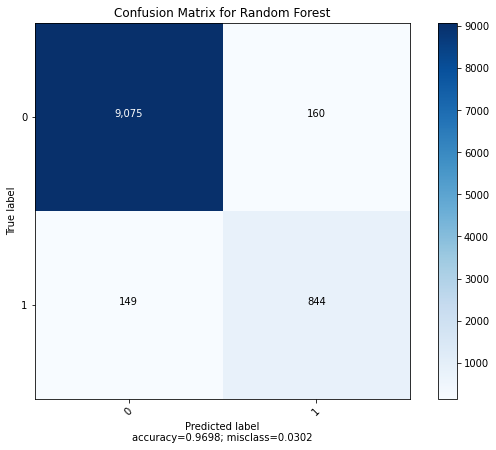

In [ ]:
#Confusion matrix to display the accuracies of predictions visually.
#Consution Matrix for Random Forest
confusion = confusion_matrix(y_test, predict_test_rfc, labels=[0, 1])
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix for Random Forest',normalize=False)

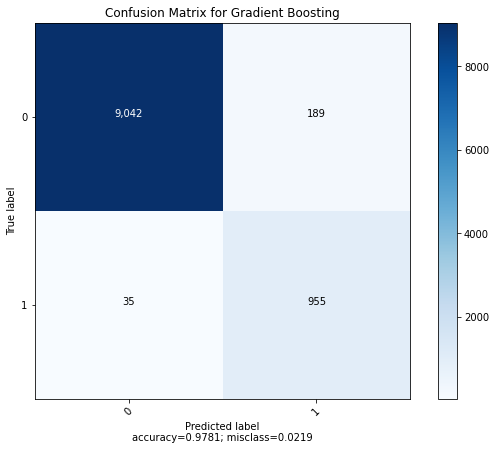

In [ ]:
#Confusion matrix to display the accuracies of predictions visually.
confusion = confusion_matrix(y_test, predict_test, labels=[0, 1])
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix for Gradient Boosting',normalize=False)

With the Credit Loan dataset, data analysis has been performed for x values = loan status, current loan amount, credit score, term, home owernship, etc. and y value = bankrupcies. Four different machine learning models has been used for the analysis: Ordinary Least Squares, Decision Tree, Random Forest, and Gradient Boosting. Based on my research, Gradient Boosting has performed the best result with the highest accuracy among all four models. 